## Transfer Learning And Pneomunia Detection

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
#from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Here we using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80150528/80134624 [==============================] - 2099s 26us/step


In [4]:
# didn't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# needed for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# viewing the structure of our model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# tell the model that cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# set rescale, shear, zoom range of the data to get efficient and faster processing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you the image size and size of each batch input
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
# fit the model
# It will take some time to execute, depending on our pc configuration
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1144s 7s/step - loss: 0.6020 - accuracy: 0.8114 - val_loss: 0.6295 - val_accuracy: 0.7804
Epoch 2/5
163/163 [==============================] - 1344s 8s/step - loss: 0.1383 - accuracy: 0.9503 - val_loss: 0.2593 - val_accuracy: 0.9087
Epoch 3/5
163/163 [==============================] - 1423s 9s/step - loss: 0.1350 - accuracy: 0.9438 - val_loss: 0.2425 - val_accuracy: 0.9183
Epoch 4/5
163/163 [==============================] - 1432s 9s/step - loss: 0.1204 - accuracy: 0.9488 - val_loss: 0.2386 - val_accuracy: 0.9231
Epoch 5/5
163/163 [==============================] - 1312s 8s/step - loss: 0.0903 - accuracy: 0.9677 - val_loss: 0.2519 - val_accuracy: 0.9135


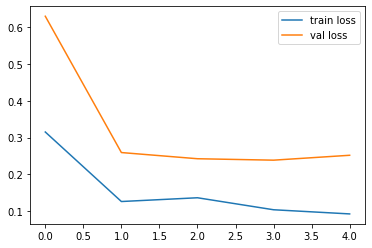

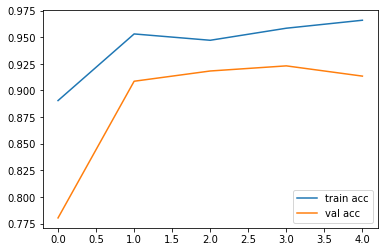

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.jpg')

In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [16]:
# Similary done for Vgg 19, Resnet50 etc. models

#from keras.applications.vgg19 import VGG19
# from keras.applications.inception_v3 import InceptionV3
